1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

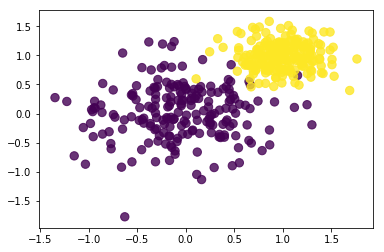

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy

from IPython.display import Image
Image('two_categories_scatter_plot.png')

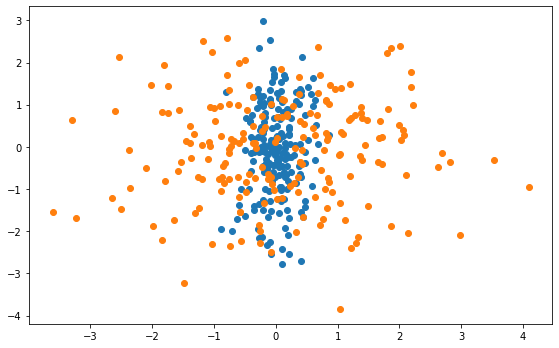

In [2]:
#Define the function
def f(n):
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.tight_layout()
    for i in range(n):
        x = np.random.normal(0, np.random.uniform(0.,2.),200) 
        y = np.random.normal(0, np.random.uniform(0.,2.),200) 
        plt.scatter(x,y)

f(2)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

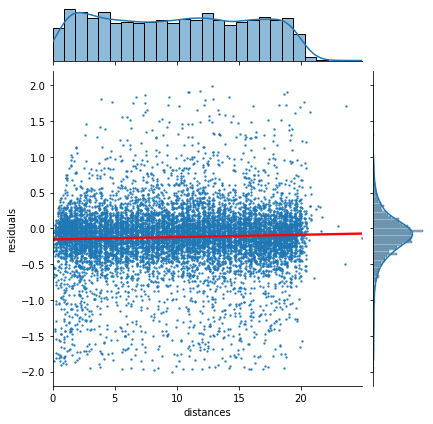

In [7]:
dataframe = pd.read_pickle("residuals_261.pkl")
file=dict(pd.read_pickle("residuals_261.pkl").item())

#Convert the content to a Pandas Dataframe
datapanda=pd.DataFrame(file)

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
datapanda = datapanda.loc[(datapanda["residuals"] > -2) & (datapanda["residuals"] < 2)]

#Plot a Seaborn jointplot
sns.jointplot(x="distances", y="residuals", data=datapanda, kind = "reg", scatter_kws={"s": 2}, line_kws={"color": "red"})
plt.show()

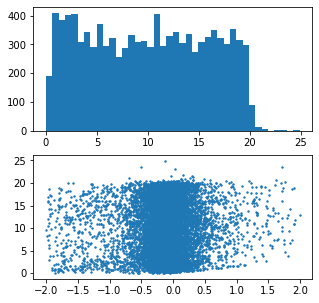

In [10]:
#Create manually a profile histogram for the "distance" variable
figure, axis = plt.subplots(2, 1,figsize=(5,5))
a,bins,_=axis[0].hist(datapanda.distances,bins=40)

x=np.array([0.5*(bins[i]+bins[i+1]) for i in range(0,len(bins)-1)])
y=np.zeros(len(bins))
err_y=np.zeros(len(bins))

for i in range(0,len(bins)-1):
    cent=datapanda.loc[(datapanda["distances"] >bins[i]) & (datapanda["distances"] <bins[i+1])].residuals
    y[i]=np.mean(cent)
    err_y[i]=np.std(cent)
    
axis[1].scatter(datapanda.residuals,datapanda.distances, s = 2)
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


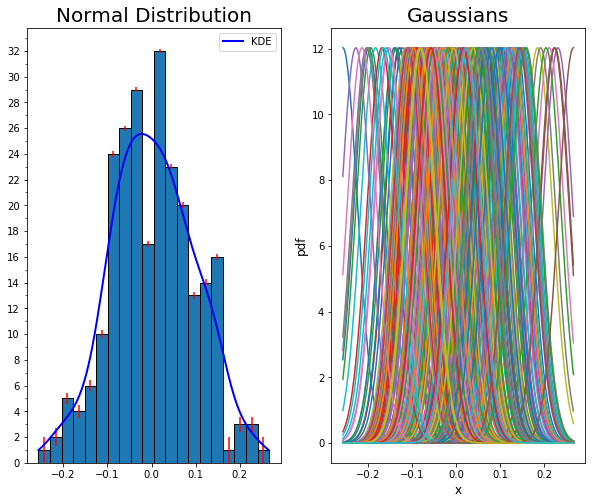

In [27]:
#import some libraries
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy import integrate

mean = 0
std = 0.1
samples = 250
x = np.random.normal(mean, std, samples)

#Hist_plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))
y, bins, patches = ax1.hist(x, 20, edgecolor = 'black')
center_bins = 0.5*(bins[1:]+bins[:-1])
err_y = 1/np.sqrt(y)
ax1.set_ylabel("")
ax1.errorbar(center_bins, y, err_y, color = 'red',  fmt = 'none')
ax1.set_title('Normal Distribution', fontsize = 20)
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(2))

# Gaussian Dist   
gaussian=[]
grid = np.linspace(x.min(), x.max(), samples)
    
for item in x:
    std = 1.06*x.std()*x.size**(-0.2) #based-on the formula
    gauss = norm.pdf(grid, item, std) 
    gaussian.append(gauss)
    ax2.plot(grid, gauss)

ax2.set_title('Gaussians', fontsize = 20)
ax2.set_xlabel("x", fontsize = 12)
ax2.set_ylabel('pdf', fontsize = 12)

# Sum of gaussian and normalization
sum_guassian = np.sum(gaussian, axis = 0)
norm_gaussian = np.trapz(np.sum(gaussian,axis=0),grid)/np.trapz(y, x = center_bins)
normalized_sum = sum_guassian/norm_gaussian 
ax1.plot(grid, normalized_sum, label = 'KDE', color = 'blue', linewidth = 2)
ax1.legend(fontsize = 10)